In [131]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
from scipy import optimize
from scipy import stats
plt.style.use("ggplot")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['font.family'] = 'IPAexGothic'

import warnings
warnings.filterwarnings('ignore') # warningが出ないように設定
pd.set_option("display.max_rows", None) # pandasの表示上限をなくす
pd.set_option("display.max_columns", None) # pandasの表示上限をなくす
import pickle

f = open("mean_vec_list.binaryfile",'rb')
mean_vec_list = pickle.load(f)

In [132]:
import gensim

model = gensim.models.Word2Vec.load("latest-ja-word2vec-gensim-model/word2vec.gensim.model")

In [133]:
len(mean_vec_list)

326

In [174]:
result_vec_list  = []

imput_word_list = ['日本', "東京", "アメリカ", "パリ", "フランス"]

for w in imput_word_list:

    w_to_v = model.wv[w]

    for mean_vec in mean_vec_list:
        result_vec_plus = w_to_v - mean_vec 
        result_vec_minus =   w_to_v + mean_vec 
    
        result_vec_list.append(result_vec_plus)
        result_vec_list.append(result_vec_minus)

In [175]:
len(result_vec_list)

3260

# 計算方法

1. 入力単語に対して, 関係ベクトルを足し算and引き算=>推定用のベクトルを算出
2. 推定ベクトルと単語ベクトルで類似度が高いやつをそれぞれ3個出す
2. 出力単語の頻度
2. 

In [176]:
import numpy as np

output_list = []
max_n = 5

for vec in result_vec_list:
    most_similar = np.array(list(model.wv.most_similar([vec], [], max_n)))
    
    output_list.extend(most_similar[:,0])

In [177]:
lll = []

for imput_word in imput_word_list:
    output_list = [word for word in output_list if word != imput_word]

In [178]:
len(output_list)

14946

In [179]:
len(set(output_list))

4375

In [180]:
import collections

c = collections.Counter(output_list)
c

Counter({'大量破壊兵器': 4,
         '旧ソ連': 7,
         'ヴェルナー・メルダース': 1,
         'ブルーコスモス': 2,
         '北海道根室市': 1,
         '長崎県長崎市': 3,
         '北海道函館市': 1,
         '下田市': 1,
         '長野県飯田市': 1,
         'メイザーズ': 4,
         'よしだみほ': 2,
         '漫画家': 18,
         '日本漫画家協会': 4,
         'ギニア湾': 7,
         '国際水路機関': 12,
         'アラビア湾': 19,
         '西南アジア': 3,
         'モーリタニア': 5,
         '日本国内': 19,
         '寛司': 8,
         '戦後占領期': 6,
         '口蹄疫': 5,
         '台湾出身': 11,
         '–）': 3,
         '1973年生まれ': 8,
         '被害者学': 2,
         '翻訳家': 2,
         'ノンフィクション作家': 19,
         '在日韓国人': 5,
         '東京出身': 4,
         '島嶼国': 6,
         'ファイアリー・クロス礁': 2,
         '日本海': 4,
         'クリル諸島': 5,
         '日本の鉄道': 19,
         'JRグループ': 6,
         'JR九州': 4,
         'フランツ・ファノン': 1,
         '中国地理学会': 1,
         '思想の科学': 1,
         '海守': 1,
         'サッカー専門誌': 1,
         'いちらん': 3,
         '日本の農業': 5,
         'いじけん': 4,
         'とうき': 2,
         '英米': 78,
  

In [181]:
len(set(output_list))

4375

# ワードクラウドで可視化する

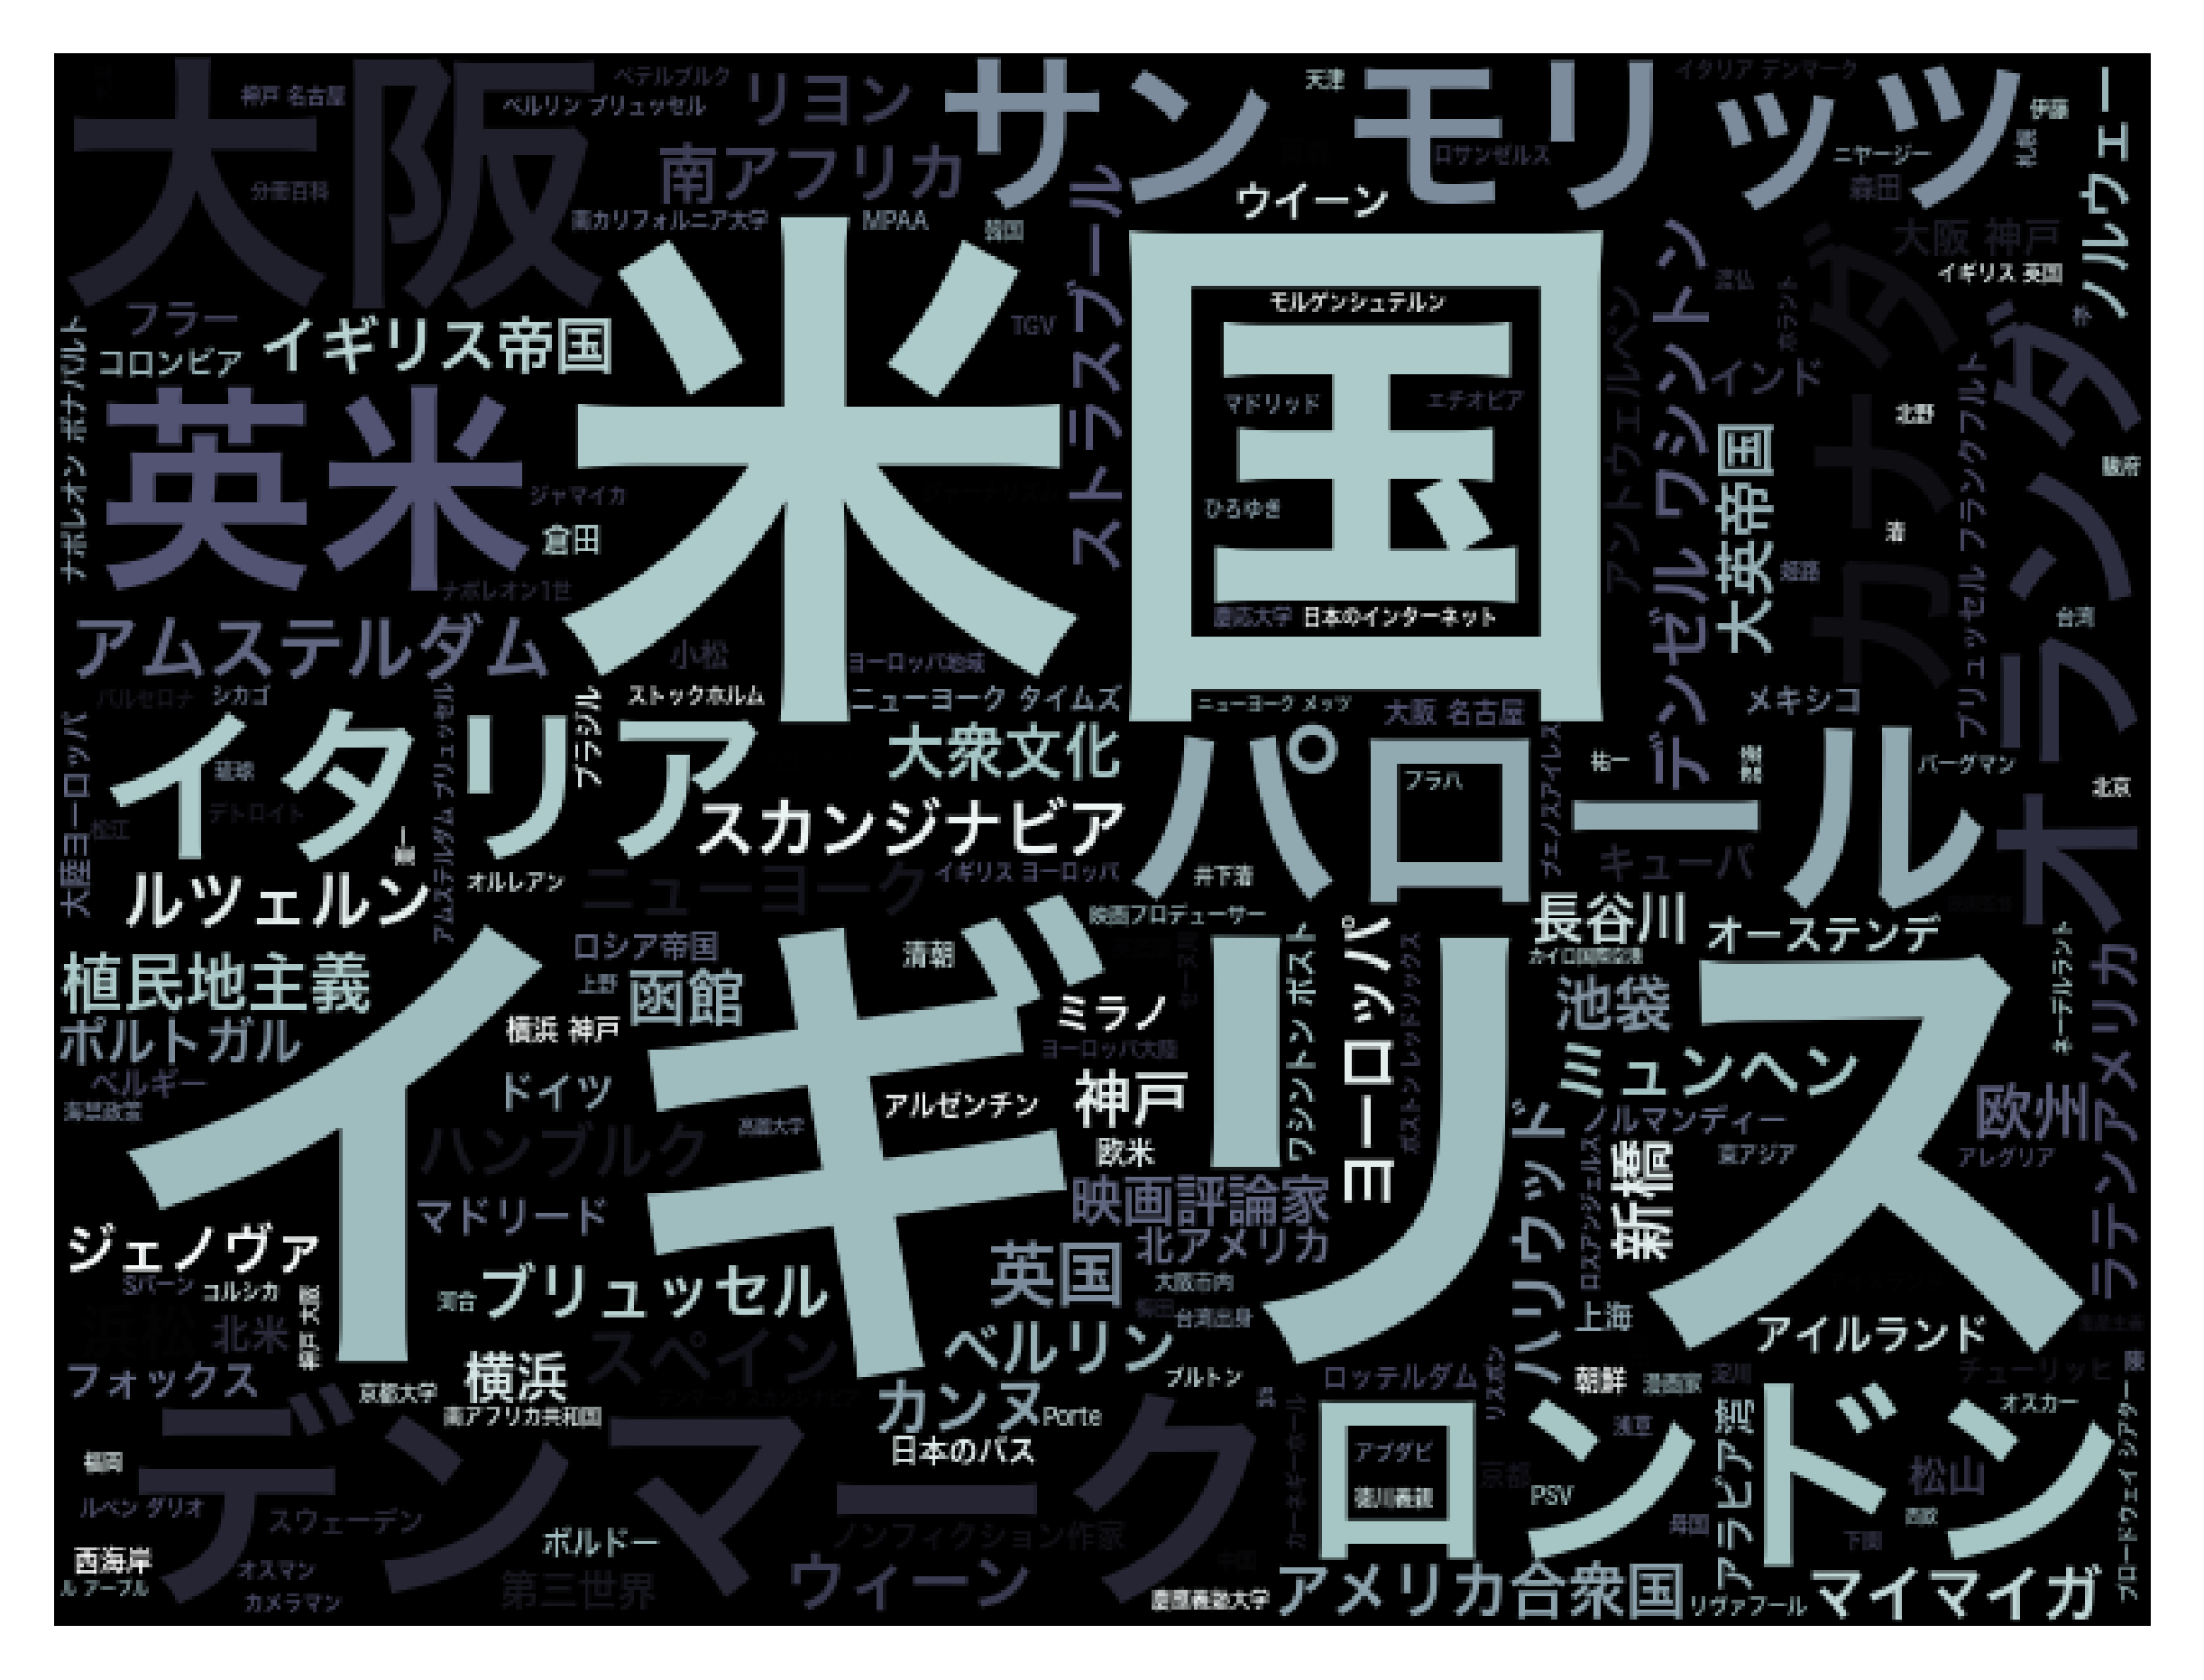

In [182]:
# リストを文字列に変換
word_chain = ' '.join(output_list)

font = "/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc"

# ワードクラウド作成
W = WordCloud(width=640, height=480, background_color='black', colormap='bone',font_path =font).generate(word_chain)

plt.figure(figsize=(5,5), dpi=300)
plt.axis("off")
#plt.imshow(W, interpolation="bilinear")
plt.imshow(W)
plt.show()